In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from itertools import chain, combinations, permutations
from skmultilearn.problem_transform import LabelPowerset
from sklearn.dummy import DummyClassifier

from collections import OrderedDict

In [2]:
features = pd.read_csv('../data/features_plus_descriptions.csv')
features.set_index('Feature Type and Number', inplace=True)

In [3]:
df_multilabel_strict = pd.read_csv('../data/multilabel_raw_data_strict.csv')
df_multilabel_tol = pd.read_csv('../data/multilabel_raw_data_tol.csv')
df_multiclass = pd.read_csv('../data/multiclass_target_raw_data.csv')
H_Best = ['H0_Best', 'H1_Best', 'H2_Best', 'H3_Best', 'H4_Best', 'H5_Best']

y_strict = df_multilabel_strict[H_Best] 
y_tol = df_multilabel_tol[H_Best]
y_orig = df_multiclass[H_Best]

y_best = df_multiclass['Best Heuristic']

X_strict = df_multilabel_strict.drop(H_Best, axis=1)
X_tol = df_multilabel_tol.drop(H_Best, axis=1)
X_orig = df_multiclass.drop(H_Best + ['Best Heuristic'], axis=1)
X_orig.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39
0,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.0,0.020202,0.80639,0.99624,0.80263,0.73684,0.00188,0.73872,0.073308,0.18797
1,0.83307,0.99682,0.83307,0.76948,0,0.77107,0.068363,0.16057,6,1.2734,...,0.0,0.020202,0.80639,0.99624,0.80263,0.74248,0.00188,0.74436,0.067669,0.18797
2,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.0,0.020202,0.80639,0.99624,0.80263,0.74060,0.00188,0.74248,0.069549,0.18797
3,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.0,0.020202,0.80639,0.99624,0.80263,0.72932,0.00188,0.73120,0.080827,0.18797
4,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.0,0.020202,0.80639,0.99624,0.80263,0.73120,0.00188,0.73308,0.078947,0.18797


In [4]:
y_orig.head()

,H0_Best,H1_Best,H2_Best,H3_Best,H4_Best,H5_Best
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [5]:
y_strict.head()

,H0_Best,H1_Best,H2_Best,H3_Best,H4_Best,H5_Best
0,1,0,0,0,0,0
1,0,1,1,0,1,1
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [6]:
y_best.head()

0    0
1    1
2    0
3    0
4    0
Name: Best Heuristic, dtype: int64

In [7]:
def get_unique_combos(X, y):
    lp = LabelPowerset(DummyClassifier(strategy='stratified'))
    lp.fit(X, y)
    return lp.unique_combinations_

def print_mapping(dictionary):
    for key in dictionary.keys():
        print('{} : {}'.format(key, dictionary[key]))
        
def str_keys_to_list(string):
    return [int(num) for num in string.split(',')]

In [8]:
unique_strict = get_unique_combos(X_strict, y_strict)
unique_tol = get_unique_combos(X_tol, y_tol)
unique_orig = get_unique_combos(X_orig, y_orig)
print_mapping(unique_strict)

0 : 0
1,2,4,5 : 1
1,2,4 : 2
3 : 3
4,5 : 4
2,3 : 5
5 : 6
1 : 7
1,2,3,4,5 : 8
1,4 : 9
2 : 10
1,3,4,5 : 11
1,2,3 : 12
2,3,4,5 : 13
4 : 14
1,2 : 15
3,5 : 16
2,4,5 : 17
2,5 : 18
2,3,4 : 19
1,3 : 20
3,4,5 : 21
1,5 : 22
1,4,5 : 23
1,3,5 : 24
3,4 : 25
1,2,3,4 : 26
1,3,4 : 27
2,3,5 : 28
2,4 : 29
1,2,5 : 30
1,2,3,5 : 31


In [9]:
def get_powerset_counts(target, powerset):
    store_counts = {combo: 0 for combo in powerset.keys()}
    for combo in powerset.keys():
        int_list = str_keys_to_list(combo)
        pattern = np.zeros(6,dtype=int)
        for i in int_list:
            pattern[i] = 1
        for a in range(len(target)):
            if np.array_equal(target[a], pattern):
                store_counts[combo] += 1
    return store_counts

In [10]:
arr_y_orig = np.array(y_orig)
counts_orig = get_powerset_counts(arr_y_orig, unique_orig)

sorted_counts_orig = OrderedDict(sorted(counts_orig.items(), key= lambda k: k[1], reverse=True))
counts_orig_dict = pd.DataFrame(sorted_counts_orig.values(), index=sorted_counts_orig.keys())

print(counts_orig)

{'0': 2554, '1': 1089, '3': 748, '4': 617, '2': 486, '5': 624}


In [11]:
arr_y_strict = np.array(y_strict)
counts_strict = get_powerset_counts(arr_y_strict, unique_strict)

sorted_counts_strict = OrderedDict(sorted(counts_strict.items(), key= lambda k: k[1]))
counts_strict_df = pd.DataFrame(sorted_counts_strict.values(), index=sorted_counts_strict.keys(), columns=['strict'])
print(counts_strict_df)

           strict
1,2,3,5         3
1,2,5           5
1,2,3,4         7
1,3,4           7
2,3,4           9
1,3,5          10
1,2,3          12
3,4            12
2,3,5          13
2,4,5          15
2,5            16
1,2,4          26
2,3,4,5        26
2,3            29
1,2            31
3,4,5          31
1,5            31
2,4            31
1,3            34
1,2,4,5        38
1,4,5          63
1,3,4,5        69
1,4            75
1,2,3,4,5      84
3,5            85
4,5           141
2             347
4             476
1             594
3             620
5             624
0            2554


In [12]:
col = [2554, 624, 748, 1089, 617, 486 ] + [0] * 26
col = col[::-1]
print(col)
column_to_add = pd.Series(col, index=counts_strict_df.index)
counts_strict_df['orig'] = column_to_add

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 486, 617, 1089, 748, 624, 2554]


In [13]:
counts_strict_df

,strict,orig
"1,2,3,5",3,0
"1,2,5",5,0
"1,2,3,4",7,0
"1,3,4",7,0
"2,3,4",9,0
"1,3,5",10,0
"1,2,3",12,0
"3,4",12,0
"2,3,5",13,0
"2,4,5",15,0


In [14]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(1, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

## Vertical

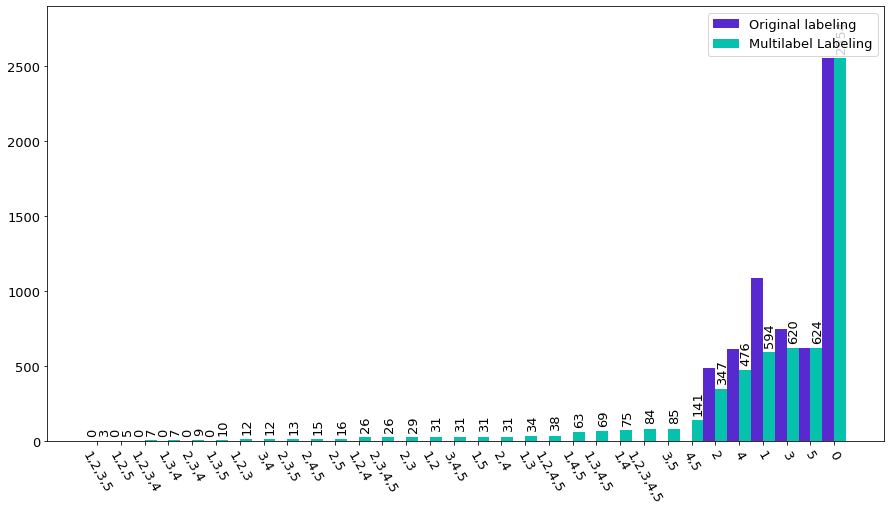

In [15]:
plt.rcParams['font.size'] = 13
fig,ax = plt.subplots(figsize=(15, 8))
ind = np.arange(counts_strict_df['orig'].values.shape[0])
width=0.5

rects1 = ax.bar(ind, counts_strict_df['orig'].values, width, label='Original labeling', color = ['xkcd:blue purple'])
rects2 = ax.bar(ind+width, counts_strict_df['strict'].values, width, label='Multilabel Labeling', color=['xkcd:turquoise'])
plt.xticks(ind+width/2, counts_strict_df.index, rotation=300)
plt.ylim(0, 2900)
autolabel(rects1[:6])
autolabel(rects2)
plt.legend()
plt.show()

## Horizontal


In [16]:
def horizontal_autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(40,-0.5), 
                    textcoords="offset points",clip_on=True,
                    ha='right', va='center', fontsize=13)

In [17]:
vals_to_plot =  counts_strict_df.loc[counts_strict_df['strict'] > 30, :]
print(vals_to_plot)



           strict  orig
1,2            31     0
3,4,5          31     0
1,5            31     0
2,4            31     0
1,3            34     0
1,2,4,5        38     0
1,4,5          63     0
1,3,4,5        69     0
1,4            75     0
1,2,3,4,5      84     0
3,5            85     0
4,5           141     0
2             347   486
4             476   617
1             594  1089
3             620   748
5             624   624
0            2554  2554


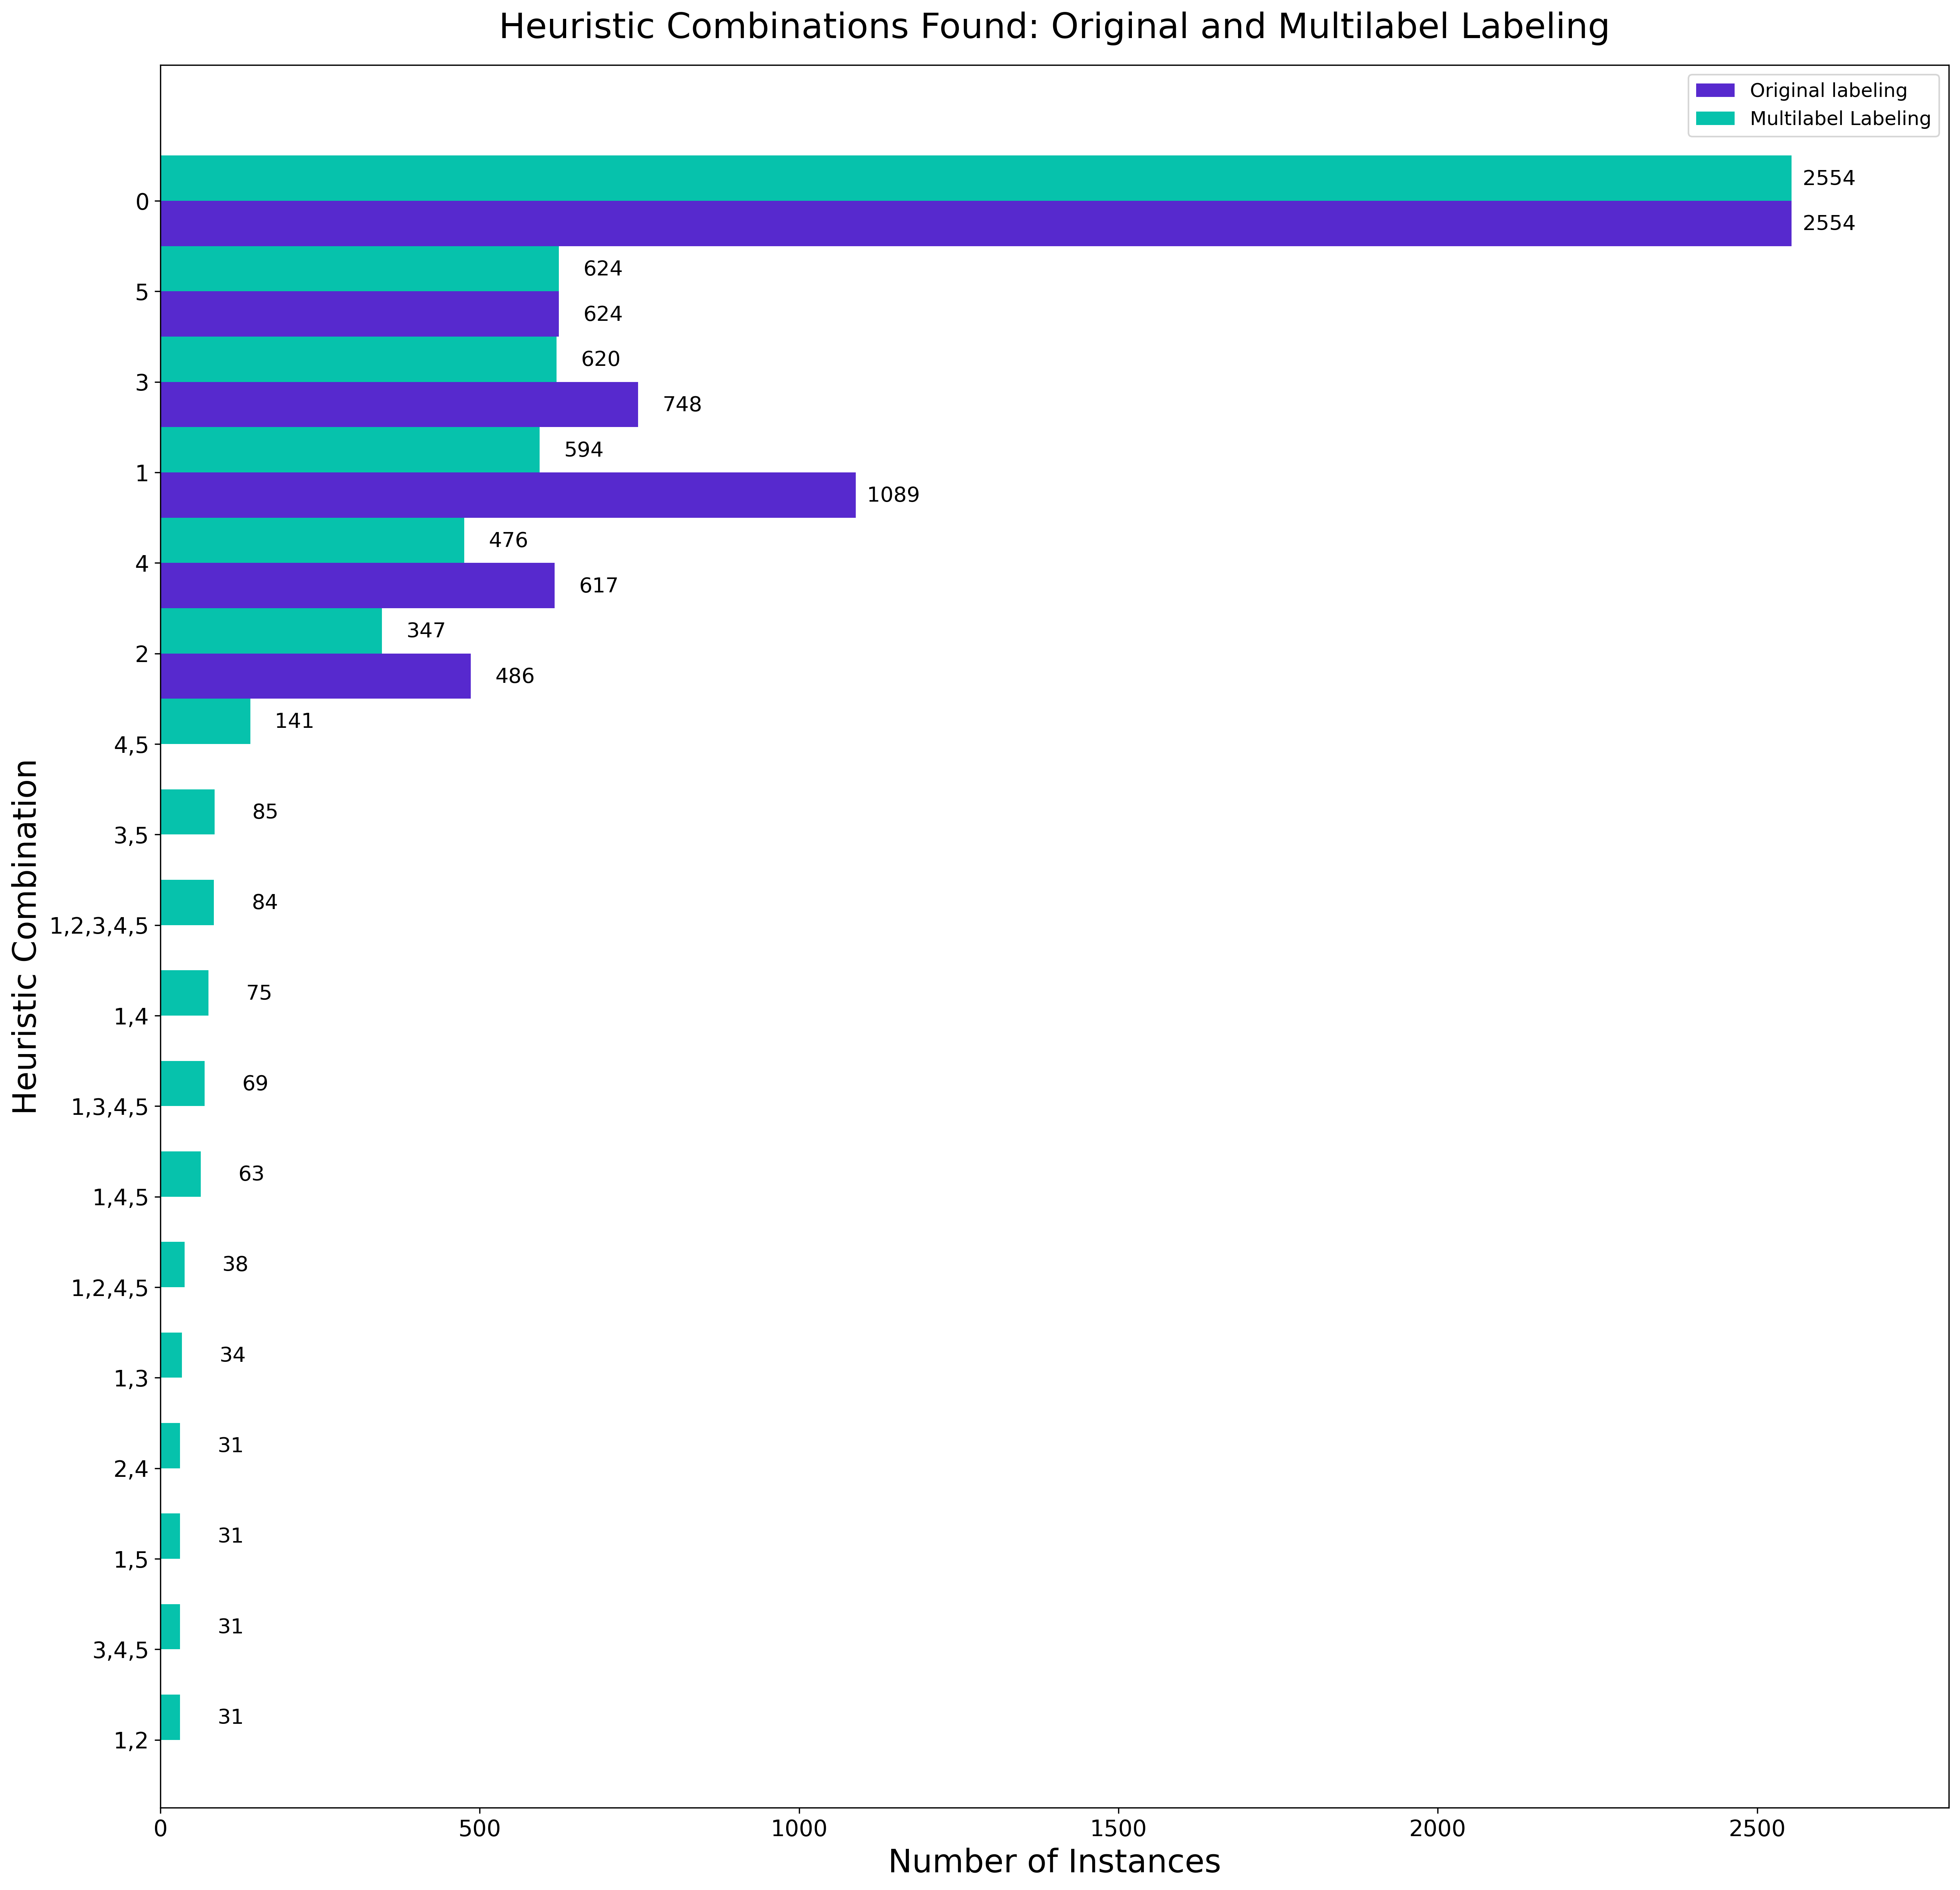

In [18]:
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 300
fig,ax = plt.subplots(figsize=(20,20))
ind = np.arange(vals_to_plot['orig'].values.shape[0])
width=0.5

rects1 = ax.barh(ind, vals_to_plot['orig'].values, width, label='Original labeling', color = ['xkcd:blue purple'])
rects2 = ax.barh(ind+width, vals_to_plot['strict'].values, width, label='Multilabel Labeling', color=['xkcd:turquoise'])
plt.yticks(ind+width/2, vals_to_plot.index, fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(0, 2800)
plt.ylim(-0.5, 18.75)
horizontal_autolabel(rects1[12:])
horizontal_autolabel(rects2)
plt.legend(loc=1)
plt.xlabel("Number of Instances", fontsize=20)
plt.ylabel("Heuristic Combination", fontsize=20)
ttl = plt.title("Heuristic Combinations Found: Original and Multilabel Labeling", fontsize=22)
ttl.set_position([.5, 1.01])
plt.savefig("../figures/heuristic_labeling_modified.png", dpi = 300)
plt.show()